# HW1: Image processing

In [102]:
import math
from PIL import Image, ImageEnhance, ImageFilter
from skimage.exposure import cumulative_distribution
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cv2

import warnings
warnings.filterwarnings("ignore")

OXXXY = 'oxxxy.jpeg'
DP = 'danya.jpeg'

1) Histogram Calculation: (3 points)
    
- Calculate and plot the histogram of the image;
- Compute the mean, standard deviation and entropy of the image;
- Interpret the results in terms of image intensity and pores distribution;
- Discuss how the statistics are related to the histogram characteristics.

In [64]:
def plot_hist(img):
    plt.hist(np.array(img).ravel(), bins=500)
    plt.ylabel('frequency')
    plt.xlabel('intensity')
    plt.show()

In [65]:
def entropy2(labels, base=None):
    # your code here
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()#log(a) b=log (c) b÷log (c) a

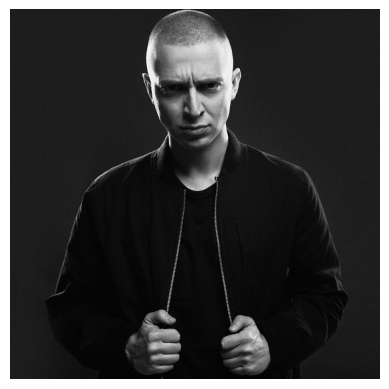

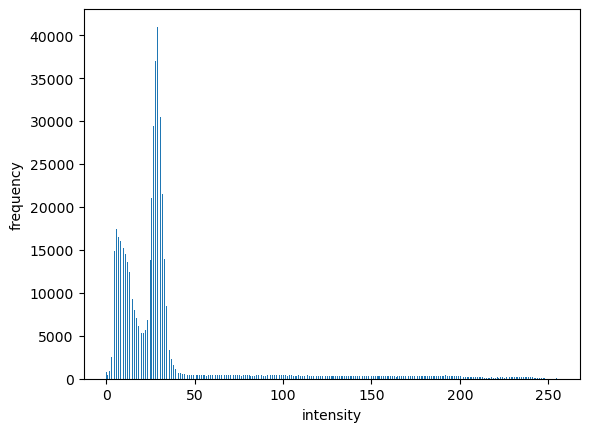

mean of image is 33.595, std is 39.793, entropy is 5.691


In [66]:
# calculate properties and plot histogram
def visulize(image: np.array, dpi: int = 300, cmap: str = "gray",
             axis: bool = False):
    plt.figure(dpi=dpi)
    plt.imshow(image, cmap)
    plt.axis(axis)
    plt.show()

def calculate_properties(image: np.array, base: int = 2):
    mean_value = image.mean()
    std_value = image.std()
    entropy = entropy2(image, base=base)
    print(f'mean of image is {round(mean_value, 3)}, std is {round(std_value, 3)}, entropy is {round(entropy, 3)}')
    
image = cv2.imread(OXXXY, cv2.IMREAD_GRAYSCALE)
visulize(image, dpi = 100)
plot_hist(image)
calculate_properties(image)

3) Thresholding: (2 points)
    
- Apply basic thresholding with 5 thresholds.

In [86]:
def plot_image(image, title=''):
    pylab.title(title, size=12), pylab.imshow(image, cmap='gray')
    pylab.axis('off') # comment this line if you want axis ticks
    
def thresholding(thresholds, img):
    # your code here
    plt.figure(figsize=(20,20))
    imgs = []
    for i in range(len(thresholds)):
        im1 = img.point(lambda x: x > thresholds[i])
        imgs.append(im1)
        pylab.subplot(len(thresholds),1,i+1), plot_image(im1, 'binary image with threshold=' + str(thresholds[i]))
    pylab.show()
    return imgs

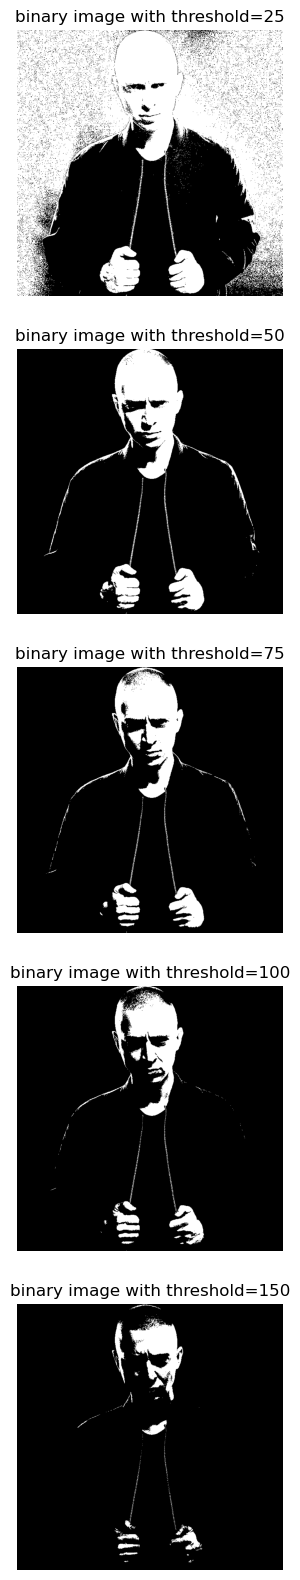

In [87]:
image = Image.open(OXXXY).convert('L')
ths = [25, 50, 75, 100, 150]
thresholding(ths, image);

4) half-toning: (5 points)
- add half-toning for improvement of contures visability after binarization (you can use noise from discrete uniform distribution)
- apply noise reduction techniques (linear/non-linear methods) and conclude which denoising technique is the best for core image, use these techniques:
    - box filter
    - Gaussian filter
    - median filter
    - non-local means filter

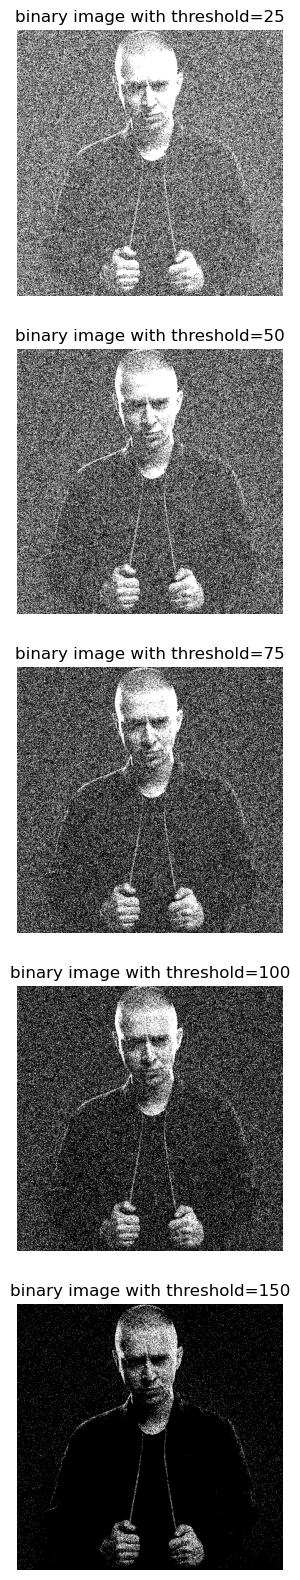

In [98]:
# your code here

noisy_image = Image.fromarray(np.clip(image + np.random.randint(-128, 128,(image.height, image.width)),
                                      0, 255).astype(np.uint8))

noisy_images = thresholding(ths, noisy_image);

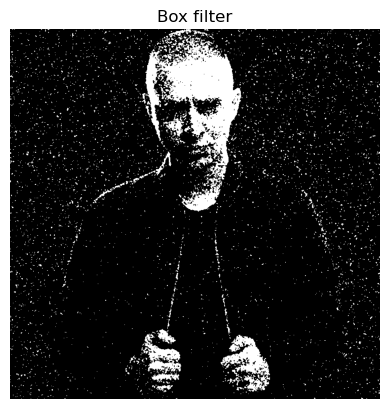

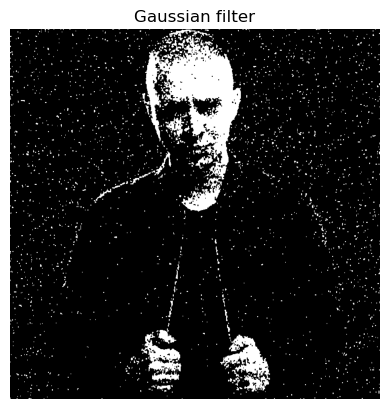

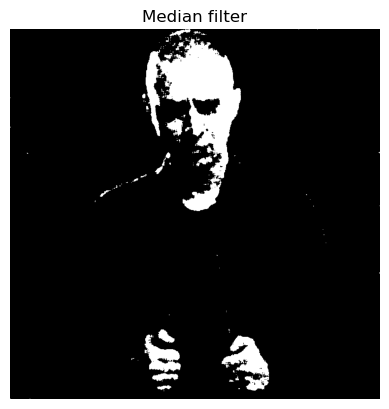

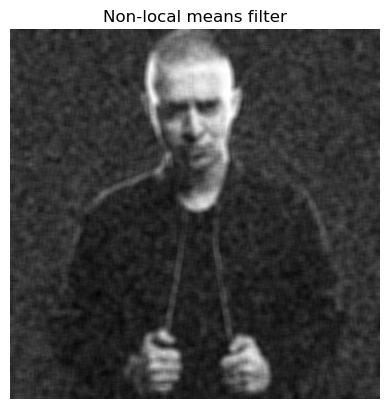

In [106]:
## box 
def box_filter(image: np.array, wsize: int = 3):
    # Apply a box filter
    filtered_image = cv2.boxFilter(np.array(image),-1,(wsize, wsize))
    plot_image(filtered_image, 'Box filter')
    pylab.show()
    return filtered_image

## gaussian
def gaussian_filter(image: np.array, wsize: int = 2):
    filtered_image = np.array(image.filter(ImageFilter.GaussianBlur(wsize)))
    plot_image(filtered_image, 'Gaussian filter')
    pylab.show()
    return filtered_image

## median
def median_filter(image: np.array, wsize: int = 7):
    filtered_image = np.array(image.filter(ImageFilter.MedianFilter(wsize)))
    plot_image(filtered_image, 'Median filter')
    pylab.show()
    return filtered_image

## non-local means
def nlm_filter(image: np.array):
    sigma_est = np.mean(estimate_sigma(np.array(image), multichannel=False))
    patch_kw = dict(patch_size=5, # 5x5 patches
                    patch_distance=6, # 13x13 search area
                    multichannel=False)
    denoise = denoise_nl_means(np.array(image), h=1.15 * sigma_est, fast_mode=False, **patch_kw)
    plot_image(denoise, 'Non-local means filter')
    pylab.show()
    return denoise

filters = [box_filter, gaussian_filter, median_filter, nlm_filter]
for filter in filters:
    filter(noisy_images[3])

5) Histogram processing: (5 points)
    
- Apply contrast stretching, histogram equalization and adaptive histogram equalization

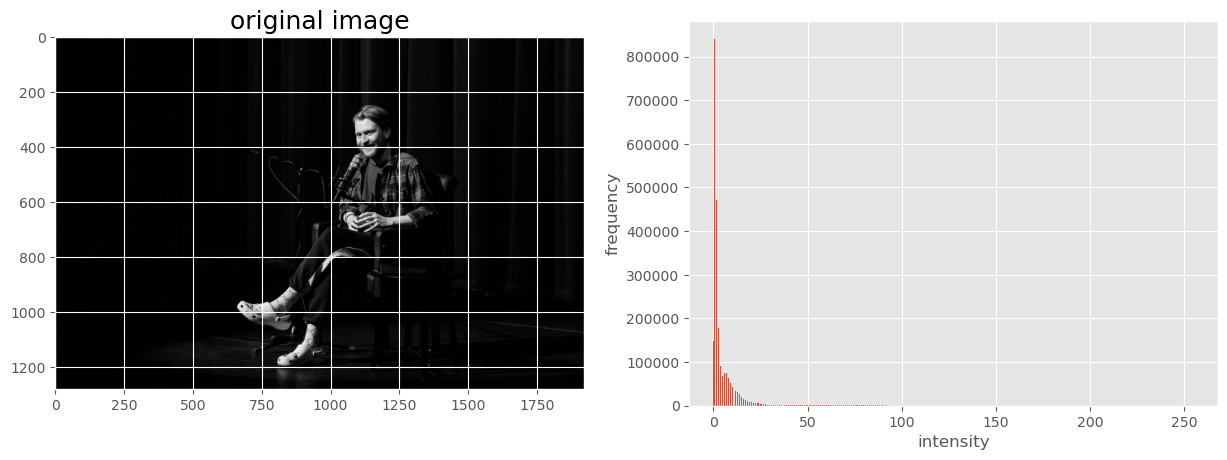

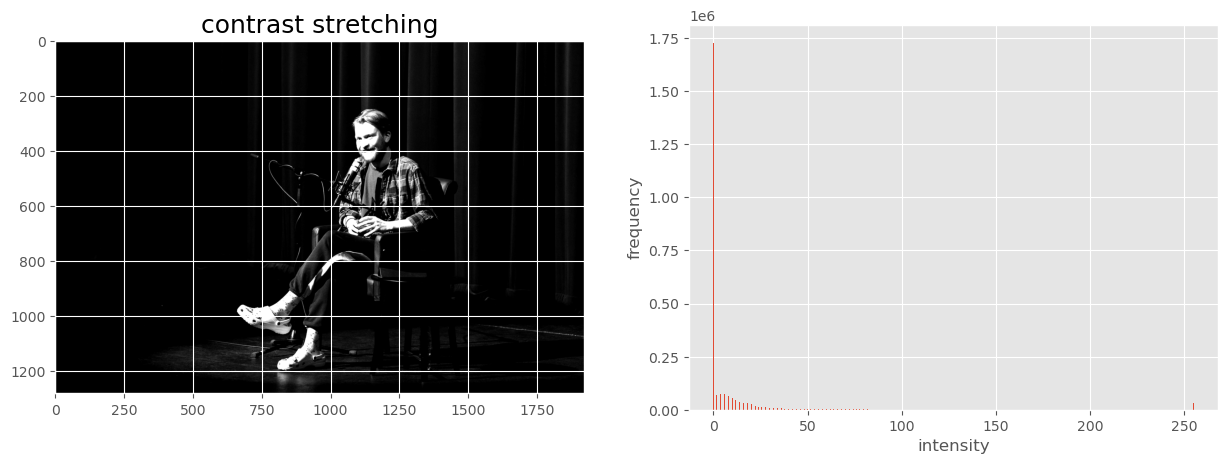

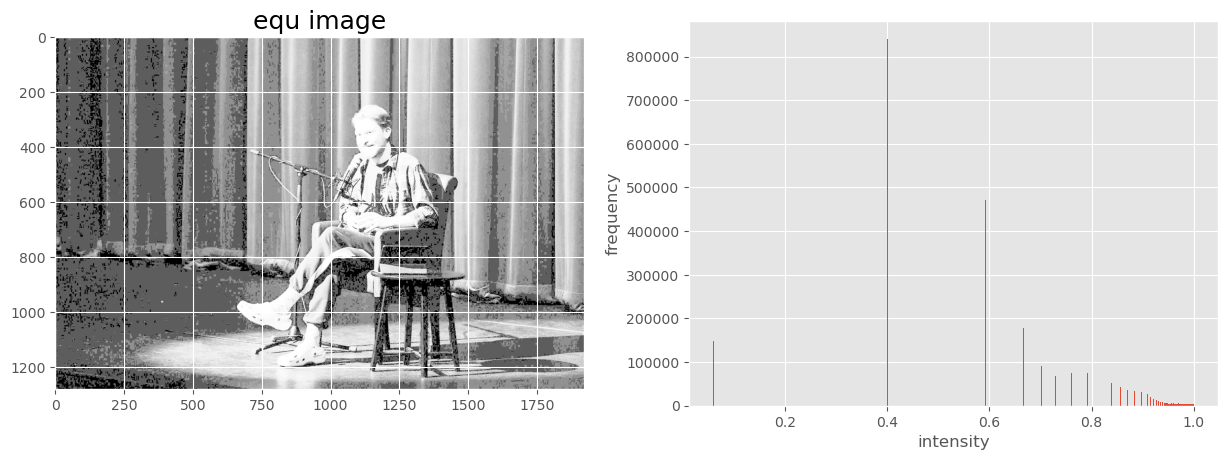

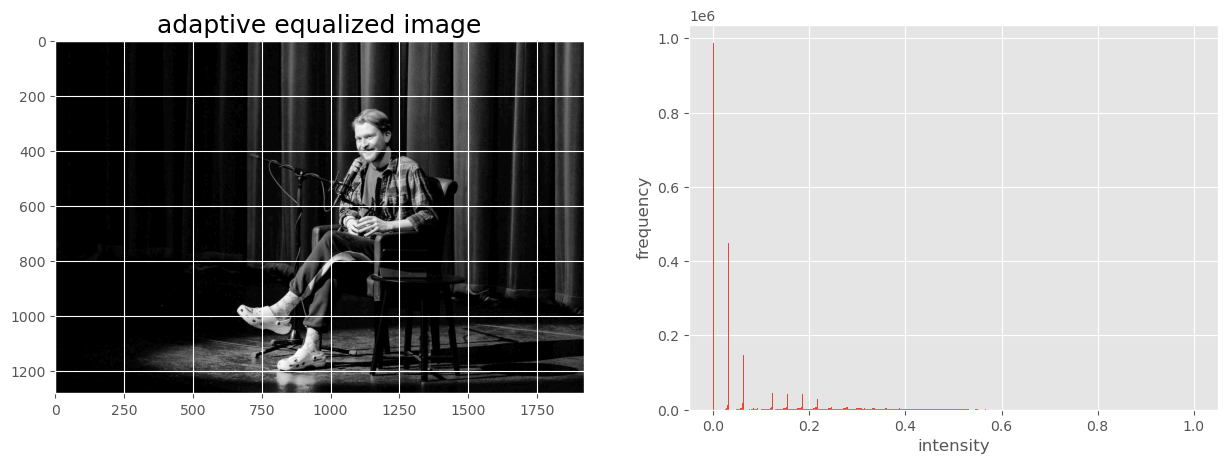

In [105]:
# your code here
image = Image.open(DP).convert('L')

def plot_img_and_hist(img, img_name=''):
    pylab.style.use('ggplot')
    pylab.figure(figsize=(15,5))
    pylab.subplot(121), pylab.imshow(img, cmap='gray'), pylab.title(img_name, size=18)
    pylab.subplot(122), plot_hist(img),# pylab.yscale('log',basey=10)
    pylab.show()

contrast = ImageEnhance.Contrast(image)
im_contr_str = np.reshape(np.array(contrast.enhance(2).getdata()).astype(np.uint8), (image.height, image.width)) 

img = np.array(image)
img_eq = exposure.equalize_hist(img)
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)


plot_img_and_hist(image, 'original image')
plot_img_and_hist(im_contr_str, 'contrast stretching')
plot_img_and_hist(img_eq, 'equ image')
plot_img_and_hist(img_adapteq, 'adaptive equalized image')